## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
# Combine the data into a single dataset
combined_csv = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
combined_csv
# print(mouse_metadata["Mouse ID"].count())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print((combined_csv["Mouse ID"].nunique()))
print((combined_csv["Mouse ID"].count()))

249
1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# find & remove duplicates: https://note.nkmk.me/en/python-pandas-duplicated-drop-duplicates/

duplicate_ids = combined_csv.loc[combined_csv.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(duplicate_ids)     


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_csv.loc[combined_csv["Mouse ID"] =="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_csv = combined_csv[combined_csv["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_csv.count()
clean_csv.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
import numpy as np

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Regimen= clean_csv.groupby("Drug Regimen")

# summary_stats = Regimen["Tumor Volume (mm3)"].describe()

Mean = Regimen["Tumor Volume (mm3)"].mean()
Median = Regimen["Tumor Volume (mm3)"].median()
var = Regimen["Tumor Volume (mm3)"].var()
st_dev = Regimen["Tumor Volume (mm3)"].std()
sem = Regimen["Tumor Volume (mm3)"].sem()




Stats_Tumor_Volume = pd.DataFrame({"Tumor_vol_mean": Mean, 
                                   "Tumor_vol_median":Median, 
                                   "Tumor_vol_var":var,
                                   "Tumor_vol_std":st_dev,
                                   "Tumor_vol_sem":sem})
Stats_Tumor_Volume

,Tumor_vol_mean,Tumor_vol_median,Tumor_vol_var,Tumor_vol_std,Tumor_vol_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

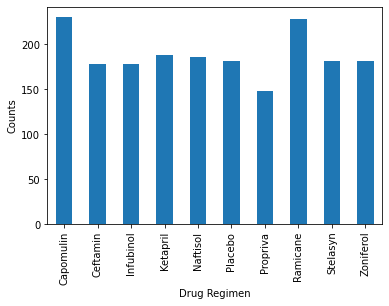

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_Regimen = Regimen["Drug Regimen"].count()
count_Regimen
count_chart = count.plot(kind = "bar")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel('Counts')

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Measurement Count')

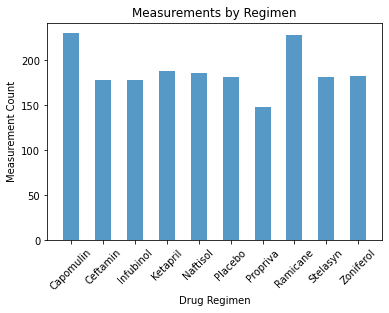

In [75]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count_Regimen = Regimen["Drug Regimen"].count()
x_axis = np.arange(0, len(count_Regimen))

tick_locations= []
for x in x_axis:
    tick_locations.append(x)

plt.xlim(-.75, len(count_Regimen)-.25)
    
plt.bar(x_axis, count_Regimen, width = .5, alpha = .75, align = "center")

plt.xticks(tick_locations,count_Regimen.index.values)
plt.xticks(rotation = 45)
plt.title("Measurements by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
